In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import collections

In [0]:
# 5.1 
data = fetch_openml("tic-tac-toe")
X = data["data"]
y = data["target"]

X_train,X_test,y_train,y_test = train_test_split(X, y)

In [0]:
# 5.2 (a)
model = MultinomialNB()
model.fit(X_train,y_train)
print("Score of trainning data = {}".format(model.score(X_train,y_train)))
print("Score of test data = {}".format(model.score(X_test,y_test)))

Score of trainning data = 0.658774373259053
Score of test data = 0.6541666666666667


In [0]:
# 5.2 (b)
model = MultinomialNB(fit_prior=False)
model.fit(X_train,y_train)
print("Score of trainning data = {}".format(model.score(X_train,y_train)))
print("Score of test data = {}".format(model.score(X_test,y_test)))

dict = collections.Counter(y_test)
print(dict)

Score of trainning data = 0.5863509749303621
Score of test data = 0.6041666666666666
Counter({'positive': 157, 'negative': 83})


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


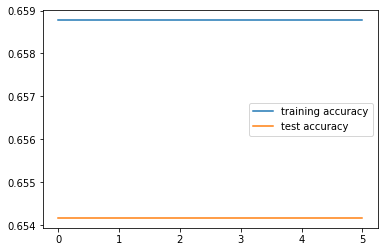

In [0]:
# 5.2 (c)
x = []
train_acc = []
test_acc = []
a = 0
while a<=5:
  model = MultinomialNB(alpha = a)
  model.fit(X_train,y_train)
  x.append(a)
  train_acc.append(model.score(X_train,y_train))
  test_acc.append(model.score(X_test,y_test))
  a+=0.01

plt.plot(x,train_acc,label = "training accuracy")
plt.plot(x,test_acc,label = "test accuracy")
plt.legend()
plt.savefig("smooth.jpg")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


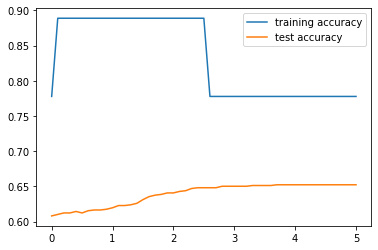

In [0]:
# 5.2 (d)
X_train,X_test,y_train,y_test = train_test_split(X, y,train_size = 0.01)
x = []
train_acc = []
test_acc = []
alpha = 0
while alpha<=5:
  model = MultinomialNB(alpha = alpha)
  model.fit(X_train,y_train)
  x.append(alpha)
  train_acc.append(model.score(X_train,y_train))
  test_acc.append(model.score(X_test,y_test))
  alpha+=0.1

plt.plot(x,train_acc,label = "training accuracy")
plt.plot(x,test_acc,label = "test accuracy")
plt.legend()
plt.savefig("smooth2.jpg")
plt.show()

In [0]:
# 5.3 (a)
from sklearn import tree
X_train,X_test,y_train,y_test = train_test_split(X, y)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Score of trainning data = {}".format(model.score(X_train,y_train)))
print("Score of test data = {}".format(model.score(X_test,y_test)))
print("depth = {}".format(model.get_depth()))
print("number of leaves = {}".format(model.get_n_leaves()))

Score of trainning data = 1.0
Score of test data = 0.9166666666666666
depth = 13
number of leaves = 126


In [0]:
# 5.3 (b)
importance = model.tree_.compute_feature_importances()
print(importance.reshape([3,3]))

[[0.10839903 0.11178266 0.16279311]
 [0.07525816 0.14033753 0.0935343 ]
 [0.12881775 0.09369984 0.08537762]]


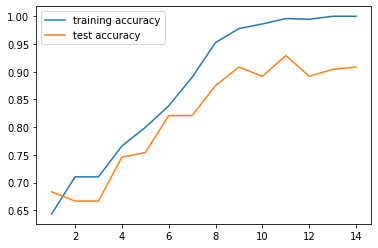

In [0]:
# 5.3 (c)
x = []
train_acc = []
test_acc = []
for depth in range(1,15):
  model = tree.DecisionTreeClassifier(max_depth=depth)
  model.fit(X_train,y_train)
  train_acc.append(model.score(X_train,y_train))
  test_acc.append(model.score(X_test,y_test))
  x.append(depth)
plt.plot(x,train_acc,label = "training accuracy")
plt.plot(x,test_acc,label = "test accuracy")
plt.legend()
plt.savefig("prune.jpg")
plt.show()

In [0]:
# 5.4 (a)
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(X_train,y_train)
print("Score of trainning data = {}".format(model.score(X_train,y_train)))
print("Score of test data = {}".format(model.score(X_test,y_test)))

Score of trainning data = 0.616991643454039
Score of test data = 0.5875


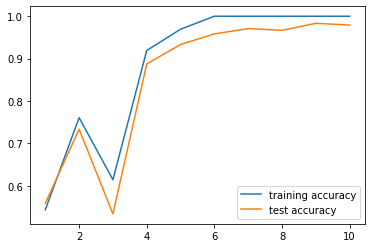

In [0]:
# 5.4 (b)
x = []
train_acc = []
test_acc = []
from sklearn.preprocessing import PolynomialFeatures
for degree in range(1,11):
  poly = PolynomialFeatures(degree)
  model = Perceptron()
  model.fit(poly.fit_transform(X_train),y_train)
  train_acc.append(model.score(poly.fit_transform(X_train),y_train))
  test_acc.append(model.score(poly.fit_transform(X_test),y_test))
  x.append(degree)
plt.plot(x,train_acc,label = "training accuracy")
plt.plot(x,test_acc,label = "test accuracy")
plt.legend()
plt.savefig("percept.jpg")
plt.show()

[1.0, 0.8467966573816156]


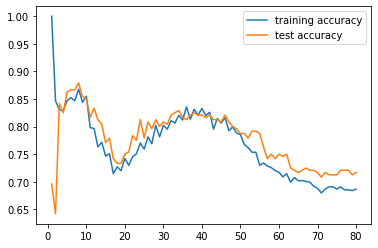

In [0]:
# 5.5
from sklearn.neighbors import KNeighborsClassifier
x = []
train_acc = []
test_acc = []
for k in range(1,81):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,y_train)
  train_acc.append(model.score(X_train,y_train))
  test_acc.append(model.score(X_test,y_test))
  x.append(k)
plt.plot(x,train_acc,label = "training accuracy")
plt.plot(x,test_acc,label = "test accuracy")
plt.legend()
plt.savefig("KNN.jpg")
plt.show()


In [0]:
print(train_acc[0:2])
print(test_acc[0:2])


[1.0, 0.8467966573816156]
[0.6958333333333333, 0.6416666666666667]
